In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [322]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
data.drop(columns=['PassengerId','SibSp','Parch','Embarked','Name','Ticket','Fare','Cabin'],axis= 1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


# Binning

In [324]:
data['Age'].isnull().sum()
data['Age'].fillna(data['Age'].mean(),inplace=True) 

In [325]:
max(data['Age'])

80.0

In [326]:
bins = np.linspace(min(data['Age']), max(data["Age"]), 5)
bins

array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])

In [327]:
group_names = ['Children','youth','M_age','Old_age']

In [328]:
data['age-binned'] = pd.cut(data['Age'], bins, labels=group_names, include_lowest=True )
data.head()

,Survived,Pclass,Sex,Age,age-binned
0,0,3,male,22.0,youth
1,1,1,female,38.0,youth
2,1,3,female,26.0,youth
3,1,1,female,35.0,youth
4,0,3,male,35.0,youth


In [329]:
data.drop(columns=['Age'],axis=1,inplace=True)

In [330]:
clas=[]
for i in data['Pclass']:
    if i == 1:
        clas.append('1st-class')
    elif i ==2:
        clas.append('2nd-class')
    else:
        clas.append('3rd-class')
        

In [331]:
data['Class']=clas
data.drop(columns=['Pclass'],axis=1,inplace=True)

In [332]:
data.head()

,Survived,Sex,age-binned,Class
0,0,male,youth,3rd-class
1,1,female,youth,1st-class
2,1,female,youth,3rd-class
3,1,female,youth,1st-class
4,0,male,youth,3rd-class


In [333]:
data['Class'].unique()

array(['3rd-class', '1st-class', '2nd-class'], dtype=object)

In [243]:
onehot=['Sex','age-binned','Class']
dumys=pd.concat((data,pd.get_dummies(data[onehot]).iloc[:,:]),axis=1)
dumys.drop(columns=['Sex','age-binned','Class'],axis=1,inplace=True)

In [244]:
dumys.head()

,Survived,Sex_female,Sex_male,age-binned_Children,age-binned_youth,age-binned_M_age,age-binned_Old_age,Class_1st-class,Class_2nd-class,Class_3rd-class
0,0,0,1,0,1,0,0,0,0,1
1,1,1,0,0,1,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,1


In [245]:
# Association rules , Apriori
from mlxtend.frequent_patterns import apriori , association_rules
df_ap = apriori(dumys,min_support=0.1, use_colnames=True)
df_ap

,support,itemsets
0,0.383838,(Survived)
1,0.352413,(Sex_female)
2,0.647587,(Sex_male)
3,0.200898,(age-binned_Children)
4,0.630752,(age-binned_youth)
5,0.143659,(age-binned_M_age)
6,0.242424,(Class_1st-class)
7,0.206510,(Class_2nd-class)
8,0.551066,(Class_3rd-class)
9,0.261504,"(Sex_female, Survived)"


In [246]:
df_ar = association_rules(df_ap,metric='confidence',min_threshold=0.1)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_female),(Survived),0.352413,0.383838,0.261504,0.742038,1.933205,0.126234,2.388577
1,(Survived),(Sex_female),0.383838,0.352413,0.261504,0.681287,1.933205,0.126234,2.031878
2,(Sex_male),(Survived),0.647587,0.383838,0.122334,0.188908,0.492155,-0.126234,0.759669
3,(Survived),(Sex_male),0.383838,0.647587,0.122334,0.318713,0.492155,-0.126234,0.517276
4,(age-binned_youth),(Survived),0.630752,0.383838,0.230079,0.364769,0.950318,-0.012028,0.969980
5,(Survived),(age-binned_youth),0.383838,0.630752,0.230079,0.599415,0.950318,-0.012028,0.921772
6,(Class_1st-class),(Survived),0.242424,0.383838,0.152637,0.629630,1.640351,0.059586,1.663636
7,(Survived),(Class_1st-class),0.383838,0.242424,0.152637,0.397661,1.640351,0.059586,1.257723
8,(Class_3rd-class),(Survived),0.551066,0.383838,0.133558,0.242363,0.631418,-0.077963,0.813267
9,(Survived),(Class_3rd-class),0.383838,0.551066,0.133558,0.347953,0.631418,-0.077963,0.688499


In [260]:
df_ar = association_rules(df_ap,metric='lift',min_threshold=1)
df_ar.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_female),(Survived),0.352413,0.383838,0.261504,0.742038,1.933205,0.126234,2.388577
1,(Survived),(Sex_female),0.383838,0.352413,0.261504,0.681287,1.933205,0.126234,2.031878
2,(Class_1st-class),(Survived),0.242424,0.383838,0.152637,0.629630,1.640351,0.059586,1.663636
3,(Survived),(Class_1st-class),0.383838,0.242424,0.152637,0.397661,1.640351,0.059586,1.257723
4,(Class_1st-class),(Sex_female),0.242424,0.352413,0.105499,0.435185,1.234873,0.020066,1.146547


In [262]:
data = df_ar[['antecedents','consequents']]
data.head()

,antecedents,consequents
0,(Sex_female),(Survived)
1,(Survived),(Sex_female)
2,(Class_1st-class),(Survived)
3,(Survived),(Class_1st-class)
4,(Class_1st-class),(Sex_female)


In [263]:
# dumys1['Survived'] = survived
# dumys1.set_index(['Survived'])
# dumys1.columns

/home/praveen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


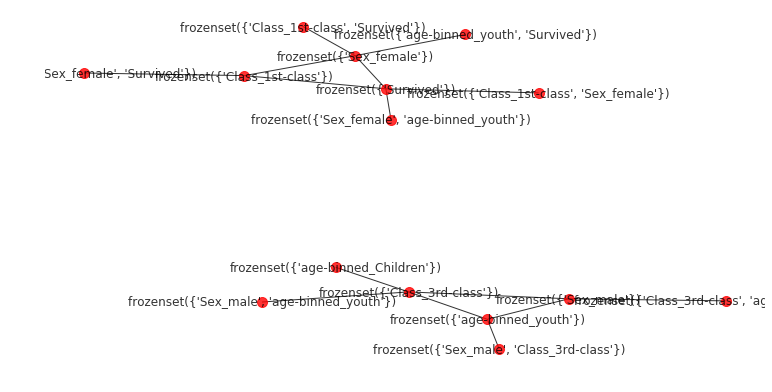

In [267]:
fig = plt.figure(figsize=(10,5))
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(data,'antecedents','consequents')
# Make the graph
nx.draw(G, with_labels=True, node_size=100,alpha=0.8, arrows=True,linewitdh=10.0)

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dt = DecisionTreeClassifier()

In [279]:
y = dumys['Survived']
x = dumys.drop(columns=['Survived'],axis = 1)
x.columns

Index(['Sex_female', 'Sex_male', 'age-binned_Children', 'age-binned_youth',
       'age-binned_M_age', 'age-binned_Old_age', 'Class_1st-class',
       'Class_2nd-class', 'Class_3rd-class'],
      dtype='object')

In [285]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [295]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [296]:
import graphviz
from sklearn import tree

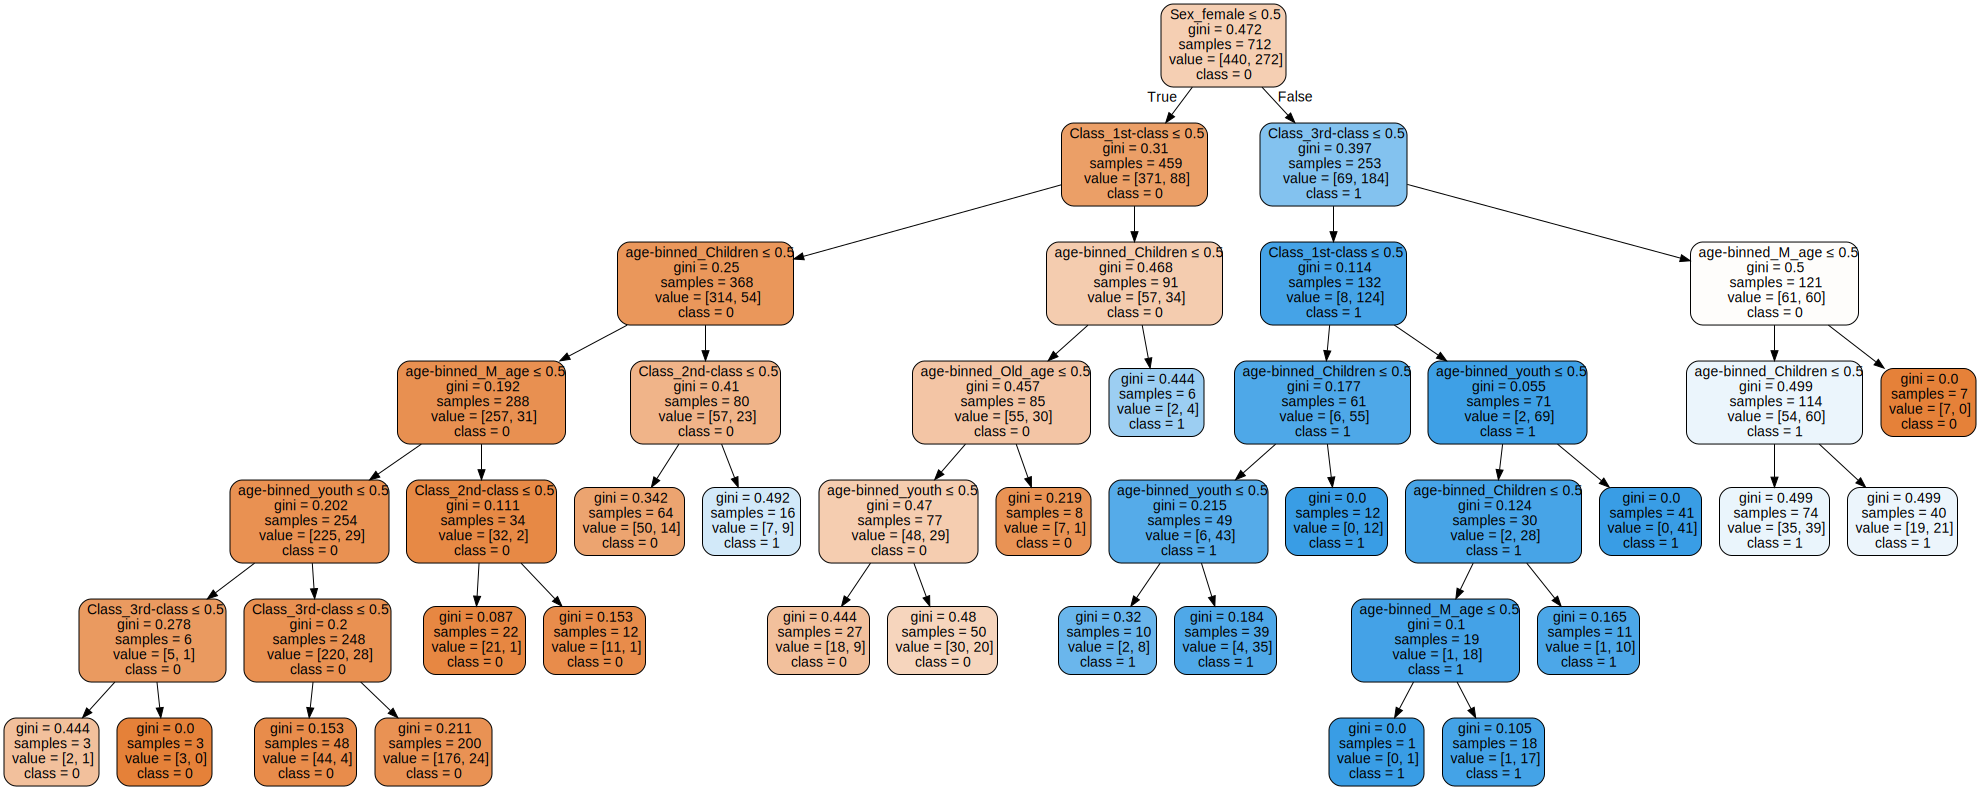

In [297]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=['Sex_female', 'Sex_male', 'age-binned_Children', 'age-binned_youth',
       'age-binned_M_age', 'age-binned_Old_age', 'Class_1st-class',
       'Class_2nd-class', 'Class_3rd-class'],class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [298]:
x_train.shape  , y_train.shape

((712, 9), (712,))

In [299]:
from pandas_ml import ConfusionMatrix
y_hat_train = dt.predict(x_train)
y_hat_test = dt.predict(x_test)

In [300]:
cm_train = ConfusionMatrix(y_train,y_hat_train)
cm_test = ConfusionMatrix(y_test ,y_hat_test)

In [306]:
cm_train.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.5165794066317626),
             ('95% CI', (0.474794771819941, 0.5581923029749662)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9999999674293559),
             ('Kappa', -0.026211150407003603),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [307]:
cm_test.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.5675675675675675),
             ('95% CI', (0.39488442141776015, 0.7290206268187072)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9729598083823702),
             ('Kappa', 0.06329113924050629),
             ("Mcnemar's Test P-Value", 'ToDo')])